**1.3.1 Задание**

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве. 

[1 1 1] [2 2 2]
Расстояние между точками по Евклидовой метрике:  1.7320508075688772
Расстояние между точками по метрике Хемминга:  3.0
Расстояние между точками по метрике Чебышева:  1.0
[1 1 1] [3 3 3]
Расстояние между точками по Евклидовой метрике:  3.4641016151377544
Расстояние между точками по метрике Хемминга:  6.0
Расстояние между точками по метрике Чебышева:  2.0
[1 1 1] [4 4 4]
Расстояние между точками по Евклидовой метрике:  5.196152422706632
Расстояние между точками по метрике Хемминга:  9.0
Расстояние между точками по метрике Чебышева:  3.0
[2 2 2] [3 3 3]
Расстояние между точками по Евклидовой метрике:  1.7320508075688772
Расстояние между точками по метрике Хемминга:  3.0
Расстояние между точками по метрике Чебышева:  1.0
[2 2 2] [4 4 4]
Расстояние между точками по Евклидовой метрике:  3.4641016151377544
Расстояние между точками по метрике Хемминга:  6.0
Расстояние между точками по метрике Чебышева:  2.0
[3 3 3] [4 4 4]
Расстояние между точками по Евклидовой метрике:  1.7320

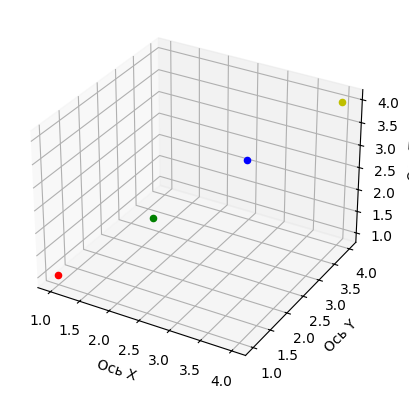

In [20]:
#1.3.1 Задание


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point_1 = np.array([1, 1, 1])
point_2 = np.array([2, 2, 2])
point_3 = np.array([3, 3, 3])
point_4 = np.array([4, 4, 4])

def scale(x1, x2):
    # Расчет расстояний между точками с помощью метрик
    distance_euclidean = np.linalg.norm(x1 - x2)
    distance_hemming = np.linalg.norm(x1 - x2, ord=1)
    distance_chebyshev = np.linalg.norm(x1 - x2, ord=np.inf)

    print(x1, x2)
    print("Расстояние между точками по Евклидовой метрике: ", distance_euclidean)
    print("Расстояние между точками по метрике Хемминга: ", distance_hemming)
    print("Расстояние между точками по метрике Чебышева: ", distance_chebyshev)

scale(point_1, point_2)
scale(point_1, point_3)
scale(point_1, point_4)
scale(point_2, point_3)
scale(point_2, point_4)
scale(point_3, point_4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(point_1[0], point_1[1], point_1[2], c='r', marker='o')
ax.scatter(point_2[0], point_2[1], point_2[2], c='g', marker='o')
ax.scatter(point_3[0], point_3[1], point_3[2], c='b', marker='o')
ax.scatter(point_4[0], point_4[1], point_4[2], c='y', marker='o')

ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')

plt.show()


**1.3.2 Задание**

Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания необходимо использовать функцию arange. 

In [21]:
#1.3.2 Задание

Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


**2.3.1 Задание**

Из графиков видно, что в первом случае классы визуально хорошо отделимы друг от друга, хотя два классе имеют небольшое пересечение. Во втором случае разделить два класса между собой уже намного труднее.  Далее разделим датасет на обучающую и тестовую выборки в соотношении 85:15. Обучающая выборка (training sample) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости. Тестовая (или контрольная) выборка (test sample) — выборка, по которой оценивается качество построенной модели. 

accuracy: 0.87


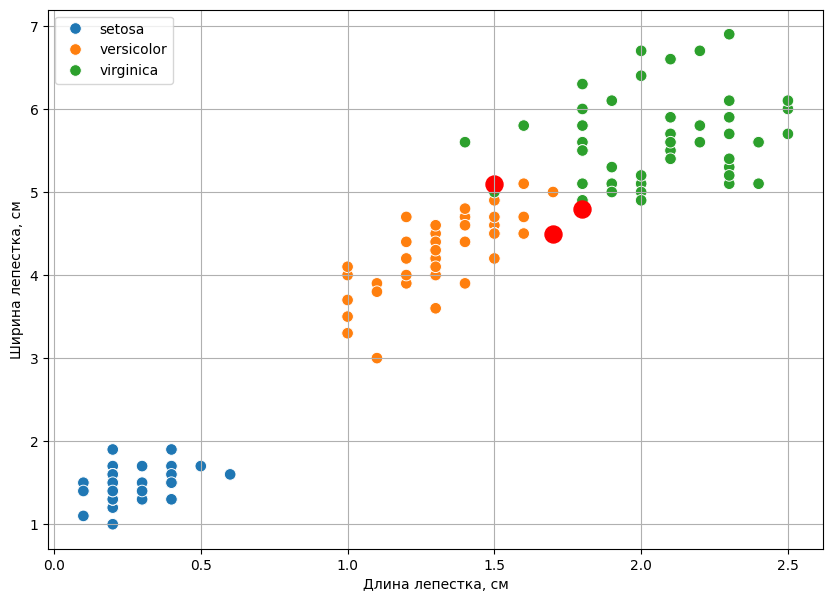

In [22]:
#2.3.1 Задание

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указывать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки
    iris.iloc[:, -1], # последнюю целевую переменную (класс)
    test_size = 0.15 # размер тестовой выборки 15%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.head()
y_train.head()

#Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
#Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

# Покажем на графике, что отражает полученное число.
# Красным цветом обозначены точки, для которых классификация сработала непрабильно.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.grid()

# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
    # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

#качество модели (доля правильно классифицированных точек)
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

**3.3.2 Задание**

Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков. 

In [24]:
#3.3.2 Задание

import pandas as pd

dataframe = pd.DataFrame({"цвет глаз": ["голубой", "зеленый", "коричневый", "голубой", "коричневый"]})

dataframe = pd.get_dummies(dataframe, columns=["цвет глаз"])
print(dataframe)

   цвет глаз_голубой  цвет глаз_зеленый  цвет глаз_коричневый
0               True              False                 False
1              False               True                 False
2              False              False                  True
3               True              False                 False
4              False              False                  True
